<a href="https://colab.research.google.com/github/Sertaky/pytorch/blob/main/02_PyTorch_Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2. Neural Network classification with PYTorch

## 1. Make Classification data and get it ready

In [66]:
import sklearn

In [67]:
from sklearn.datasets import make_circles

# make 1000 samples
n_samples = 1000

# create circles
X , y = make_circles(n_samples,
                     noise = 0.03,
                     random_state= 42)




In [68]:
len(X) , len(y)

(1000, 1000)

In [69]:
print(f'first 5 samples of X : \n {X[:5]}')
print(f'first 5 samples of y : \n {y[:5]}')

first 5 samples of X : 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first 5 samples of y : 
 [1 1 1 1 0]


In [70]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [71]:
# make dataframe of circle data
import pandas as pd

circles = pd.DataFrame({'X1': X[:,0],
                        'X2': X[:,1],
                        'label': y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


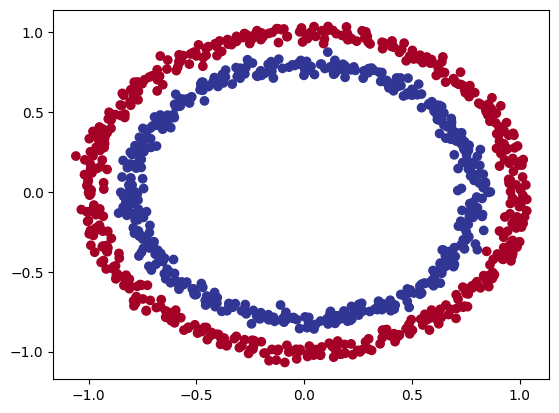

In [72]:
# visualize , visualize , visualize
import matplotlib.pyplot as plt

plt.scatter(x = X[:,0],
            y =X[:,1],
            c = y ,
            cmap =plt.cm.RdYlBu);


**Note:** This dataset is often what's considered a toy problem (a problem that's used to try and test things out on) in machine learning.

But it represents the major key of classification, you have some kind of data represented as numerical values and you'd like to build a model that's able to classify it, in our case, separate it into red or blue dots.

### 1.1 check input and output shapes

In [73]:
X.shape , y.shape

((1000, 2), (1000,))

In [74]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [75]:
#view the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f'values for one sample of X: {X_sample} and the same for y: {y_sample}')
print(f'shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}')

values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
shapes for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test split

In [76]:
import torch
torch.__version__

'2.0.1+cu118'

In [77]:
type(X) , X.dtype

(numpy.ndarray, dtype('float64'))

In [78]:
# turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5] , y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [79]:
type(X) , X.dtype , y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [80]:
# split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,
                                                       y,
                                                       test_size = 0.2, # 20% test and 80% train
                                                       random_state=42)

In [81]:
len(X_train) , len(X_test)

(800, 200)

In [82]:
len(y_train) ,len(y_test)

(800, 200)

## 2.Building a model
 let's build a model to classify our blue and red dots to do so we need to :    

  1.setup device agnostic code so our code will run on the (GPU) if there is one

  2.construct a model (by subclassing `nn.Module`)

  3.define a loss function and optimizer

  4.create a training and test loop

In [83]:
# import pytorch and nn
import torch
from torch import nn

#make agnostic device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [84]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Let's create a model class that:

1.Subclasses `nn.Module` (almost all PyTorch models are subclasses of `nn.Module`).

2.Creates 2 `nn.Linear()` layers in the constructor capable of handling the input and output shapes of X and y.

3.Defines a `forward()` method containing the forward pass computation of the model.

4.Instantiates the model class and sends it to the target device.

In [85]:
# create a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    #2. create 2 nn.linear layes capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features = 2 , out_features= 5 )
    self.layer_2 = nn.Linear(in_features = 5 , out_features = 1 )

    ...
    self.two_linear_layers = nn.Sequential(
        nn.Linear(in_features = 1 , out_features = 5),
        nn.Linear(in_features = 5 , out_features = 1)
    )
    ...
  #3. define a froward method
  def forward(self,x):
    return self.layer_2(self.layer_1(x))
    #return two_linear_layers

# 4. Instantiates the model class and sends it to the target device.
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
  (two_linear_layers): Sequential(
    (0): Linear(in_features=1, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [86]:
# let's code the same model using sequentail()
model_0 = nn.Sequential(
    nn.Linear(in_features = 2 , out_features = 5),
    nn.Linear(in_features = 5 , out_features = 1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [87]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3912, -0.3579],
                      [-0.0338,  0.3948],
                      [-0.1807, -0.4035],
                      [-0.2421, -0.5283],
                      [ 0.2522,  0.5473]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6657,  0.1642,  0.3653,  0.1282, -0.2518], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.2334,  0.2350,  0.1672, -0.0786, -0.1184]], device='cuda:0')),
             ('1.bias', tensor([0.0478], device='cuda:0'))])

In [88]:
# Make predictions with the model
untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[ 0.0089],
        [-0.0685],
        [ 0.1361],
        [-0.0269],
        [ 0.0161],
        [-0.0303],
        [-0.1531],
        [-0.1444],
        [ 0.1410],
        [-0.0751]], device='cuda:0', grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


## 2.1 Setup loss function and optimizer

different problem types require different loss functions.

For example, for a regression problem (predicting a number) you might used mean absolute error (MAE) loss.

And for a binary classification problem (like ours), you'll often use `binary cross entropy` as the loss function.

However, the same optimizer function can often be used across different problem spaces.

For example, the stochastic gradient descent optimizer `(SGD, torch.optim.SGD())` can be used for a range of problems, and the same applies to the Adam optimizer `(torch.optim.Adam())`.



In [89]:
# setup the loss function
# loss_fn = nn.BCELoss() # requires inputs to have gone through the sigmoid activation function prior to input to BCEloss
loss_fn = nn.BCEWithLogitsLoss()  #sigmoid activtion function builtin (BCE + sigmoid)

optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1)

In [90]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3912, -0.3579],
                      [-0.0338,  0.3948],
                      [-0.1807, -0.4035],
                      [-0.2421, -0.5283],
                      [ 0.2522,  0.5473]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6657,  0.1642,  0.3653,  0.1282, -0.2518], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.2334,  0.2350,  0.1672, -0.0786, -0.1184]], device='cuda:0')),
             ('1.bias', tensor([0.0478], device='cuda:0'))])

In [91]:
# calculate accuracy - out of 100 examples , what percentage does our model get right !
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

## 3. Training the model

1.forward pass

2.calculate the loss

3.optimizer zero grad

4.loss backward (back probagation)

5.optmizer step (gradient descent)

### 3.1 Going from raw model outputs to predicted labels (logits -> prediction probabilities -> prediction labels)

our model outputs are going to be raw **logits**

we can convert theses ** logits ** into **prediction probabilities** by passing them to some kind of activation function (e.g sigmoid for binary classification and softmax for multiclass classification).

then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or takinng the `argmax()`




In [92]:
# view the first 5 outputs of the forward pass on the test data

model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[ 0.0089],
        [-0.0685],
        [ 0.1361],
        [-0.0269],
        [ 0.0161]], device='cuda:0')

In [93]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [94]:
# use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5022],
        [0.4829],
        [0.5340],
        [0.4933],
        [0.5040]], device='cuda:0')

If y_pred_probs >= 0.5, y=1 (class 1)

If y_pred_probs < 0.5, y=0 (class 0)

In [95]:
torch.round(y_pred_probs)

tensor([[1.],
        [0.],
        [1.],
        [0.],
        [1.]], device='cuda:0')

In [96]:
# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 0., 1., 0., 1.], device='cuda:0')

## 3.2 Building a traing and testing loop

In [97]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the number of epochs
epochs = 100

# put data to target device
X_train , y_train = X_train.to(device) , y_train.to(device)
X_test , y_test = X_test.to(device) , y_test.to(device)

# build traing loop and evaluation loop
for epoch in range(epochs):
  ### traing
  model_0.train()

  # 1. forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

  # 2. calculate loss/accuarcy
  # loss = loss_fn(torch.sigmoid(y_logits), y_train) # nn.BCELoss expects predicitions probabilities as input
  loss = loss_fn(y_logits,  # nn.BCEwithlogitsLoss  expects raw logits as input
                 y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. loss backward
  loss.backward()

  # 5. optimizer step (gradient descent)
  optimizer.step()

  #### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. calculate the test loss / accuarcy
    test_loss = loss_fn(test_logits ,
                        y_test)
    test_acc = accuracy_fn(y_true= y_test,
                           y_pred = test_pred)

  # print out what is happening
  if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.69526, Accuracy: 49.88% | Test loss: 0.69140, Test acc: 52.50%
Epoch: 10 | Loss: 0.69477, Accuracy: 50.12% | Test loss: 0.69164, Test acc: 51.00%
Epoch: 20 | Loss: 0.69440, Accuracy: 50.25% | Test loss: 0.69190, Test acc: 50.50%
Epoch: 30 | Loss: 0.69413, Accuracy: 49.75% | Test loss: 0.69217, Test acc: 51.50%
Epoch: 40 | Loss: 0.69392, Accuracy: 49.62% | Test loss: 0.69243, Test acc: 51.00%
Epoch: 50 | Loss: 0.69376, Accuracy: 50.12% | Test loss: 0.69268, Test acc: 49.50%
Epoch: 60 | Loss: 0.69364, Accuracy: 50.50% | Test loss: 0.69291, Test acc: 49.50%
Epoch: 70 | Loss: 0.69354, Accuracy: 50.38% | Test loss: 0.69312, Test acc: 48.50%
Epoch: 80 | Loss: 0.69347, Accuracy: 50.12% | Test loss: 0.69331, Test acc: 51.00%
Epoch: 90 | Loss: 0.69341, Accuracy: 49.88% | Test loss: 0.69349, Test acc: 52.00%


## 4. Make predicitions and evaluate the model

In [98]:
import numpy as np

In [99]:
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


In [100]:
def plot_predictions(
    train_data, train_labels, test_data, test_labels, predictions=None):
    """
  Plots linear training data and test data and compares predictions.
  """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})


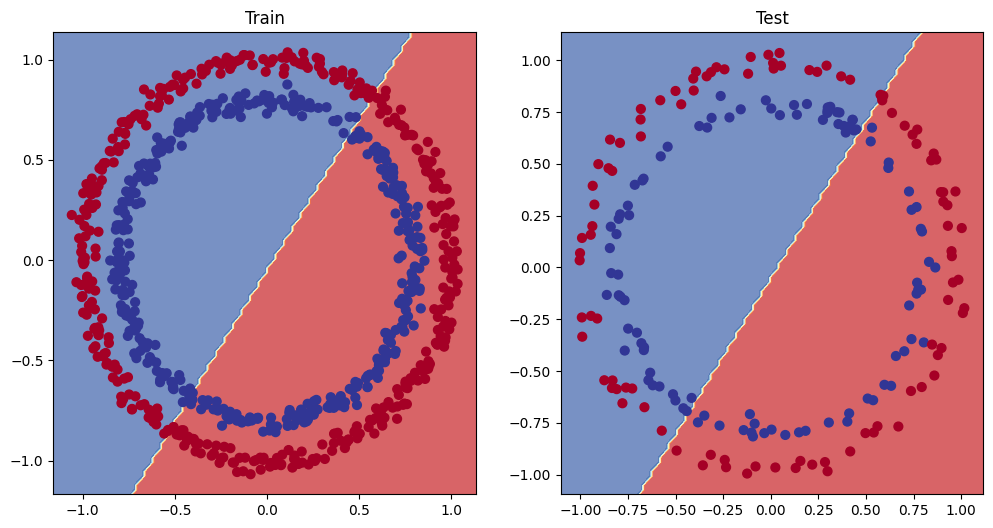

In [101]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

### 5. improving a model (fom model prespective)

* add more layers
* add more hidden units
*fit for longer
*changing the activation function
*change the learning rate
*change the loss function

**hyperparameters**

In [102]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features= 2 , out_features=10)
    self.layer_2 = nn.Linear(in_features= 10 , out_features= 10)
    self.layer_3 = nn.Linear(in_features= 10 , out_features = 1)


  def forward(self, x): # note: always make sure forward is spelt correctly!
        # Creating a model like this is the same as below, though below
        # generally benefits from speedups where possible.
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        # return z
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1


CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [103]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.122

In [104]:
# loss_fn = nn.BCELoss() # Requires sigmoid on input
loss_fn = nn.BCEWithLogitsLoss() # Does not require sigmoid on input
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [105]:
# write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

# put data to target device
X_train , y_train = X_train.to(device) , y_train.to(device)
X_test , y_test = X_test.to(device) , y_test.to(device)

for epoch in range (epochs):
  ### train model
  model_1.train()
  # 1. forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. calculate the loss/ accuracy
  loss = loss_fn(y_logits , y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred = y_pred)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. backprobagation
  loss.backward()

  #5. optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # 2. Caculate loss/accuracy
    test_loss = loss_fn(test_logits,
                            y_test)
    test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

  # Print out what's happening every 10 epochs
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69305, Accuracy: 50.38% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 200 | Loss: 0.69299, Accuracy: 51.12% | Test loss: 0.69437, Test acc: 46.00%
Epoch: 300 | Loss: 0.69298, Accuracy: 51.62% | Test loss: 0.69458, Test acc: 45.00%
Epoch: 400 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69465, Test acc: 46.00%
Epoch: 500 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69467, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%


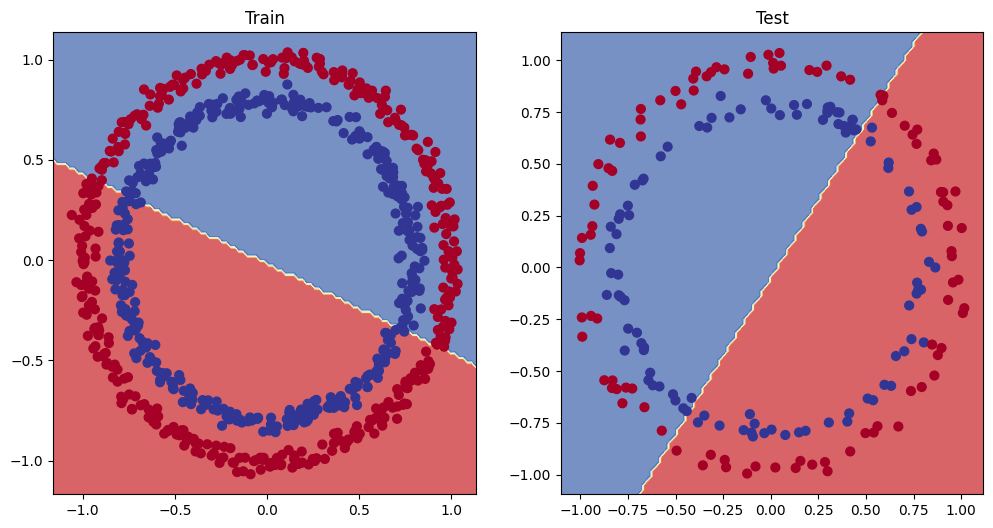

In [106]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

### 5.1 Preparing data to see if our model can model a straight line

Let's create some linear data to see if our model's able to model it and we're not just using a model that can't learn anything.

In [107]:
# create some data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# create data
X_regression = torch.arange(start,end,step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

# check data
print(len(X_regression))
X_regression[:5] , y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [108]:
# Create train and test splits
train_split = int(0.8 * len(X_regression)) # 80% of data used for training set
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each split
print(len(X_train_regression),
    len(y_train_regression),
    len(X_test_regression),
    len(y_test_regression))

80 80 20 20


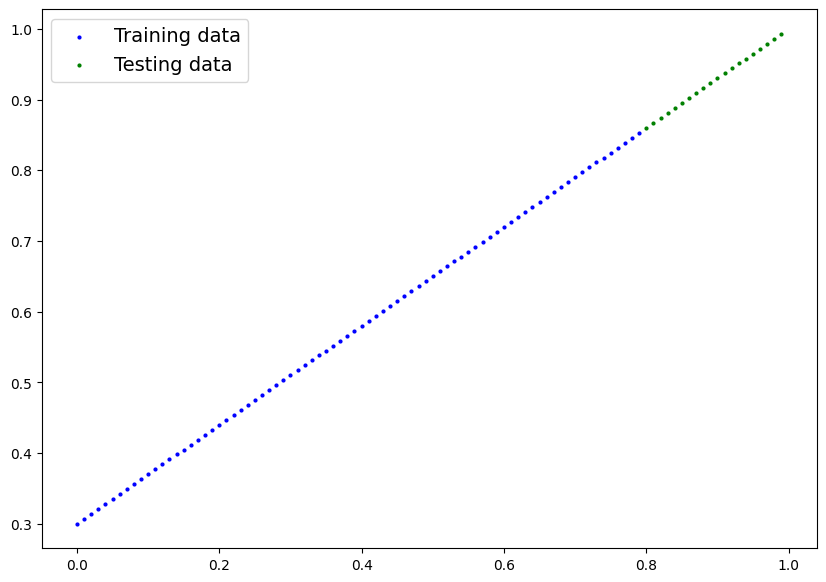

In [109]:
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression
);

###  5.2 Adjusting model_1 to fit a straight line

In [110]:
# same architecture as model_1 (but using sequential)
model_2 = nn.Sequential(
    nn.Linear(in_features = 1 , out_features = 10),
    nn.Linear(in_features = 10 , out_features = 10),
    nn.Linear(in_features = 10 , out_features = 1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [111]:
# loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr = 0.01)

In [112]:
# train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

# Put data to target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)


for epoch in range (epochs):
  ### train the model
  model_2.train()

  # 1. forward pass
  y_pred = model_2(X_train_regression)
  # 2. Calculate loss (no accuracy since it's a regression problem, not classification)
  loss = loss_fn(y_pred, y_train_regression)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backwards
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_2.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_pred = model_2(X_test_regression)
    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test_regression)

  # Print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.75986, Test loss: 0.91103
Epoch: 100 | Train loss: 0.02858, Test loss: 0.00081
Epoch: 200 | Train loss: 0.02533, Test loss: 0.00209
Epoch: 300 | Train loss: 0.02137, Test loss: 0.00305
Epoch: 400 | Train loss: 0.01964, Test loss: 0.00341
Epoch: 500 | Train loss: 0.01940, Test loss: 0.00387
Epoch: 600 | Train loss: 0.01903, Test loss: 0.00379
Epoch: 700 | Train loss: 0.01878, Test loss: 0.00381
Epoch: 800 | Train loss: 0.01840, Test loss: 0.00329
Epoch: 900 | Train loss: 0.01798, Test loss: 0.00360


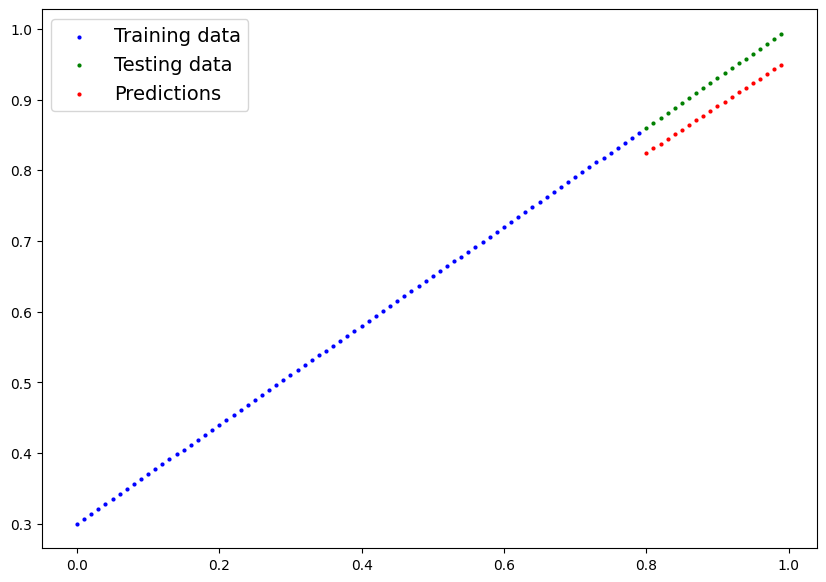

In [113]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# Plot data and predictions with data on the CPU (matplotlib can't handle data on the GPU)
# (try removing .cpu() from one of the below and see what happens)
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());

## 6. The missing piece : non-linearity

### 6.1 Recreating non-linear data ( red and blue circles )

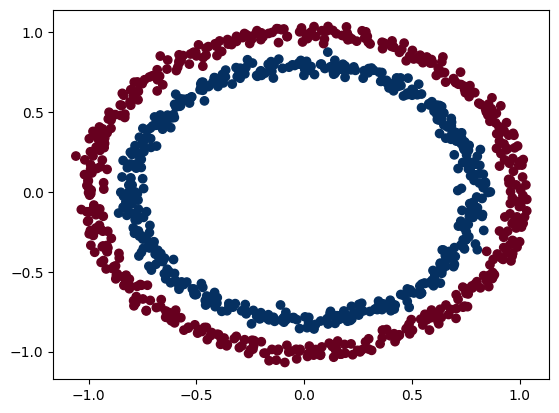

In [114]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=1000,
    noise=0.03,
    random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

In [115]:
# Convert to tensors and split into train and test sets
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42
)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non-linearity

In [116]:
# Build model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [117]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

### Training model with non-linearity

In [118]:
# Fit the model
torch.manual_seed(42)
epochs = 1000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69319, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69115, Accuracy: 52.88% | Test Loss: 0.69102, Test Accuracy: 52.50%
Epoch: 200 | Loss: 0.68977, Accuracy: 53.37% | Test Loss: 0.68940, Test Accuracy: 55.00%
Epoch: 300 | Loss: 0.68795, Accuracy: 53.00% | Test Loss: 0.68723, Test Accuracy: 56.00%
Epoch: 400 | Loss: 0.68517, Accuracy: 52.75% | Test Loss: 0.68411, Test Accuracy: 56.50%
Epoch: 500 | Loss: 0.68102, Accuracy: 52.75% | Test Loss: 0.67941, Test Accuracy: 56.50%
Epoch: 600 | Loss: 0.67515, Accuracy: 54.50% | Test Loss: 0.67285, Test Accuracy: 56.00%
Epoch: 700 | Loss: 0.66659, Accuracy: 58.38% | Test Loss: 0.66322, Test Accuracy: 59.00%
Epoch: 800 | Loss: 0.65160, Accuracy: 64.00% | Test Loss: 0.64757, Test Accuracy: 67.50%
Epoch: 900 | Loss: 0.62362, Accuracy: 74.00% | Test Loss: 0.62145, Test Accuracy: 79.00%


In [119]:
# Make predictions
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y[:10] # want preds in same format as truth labels

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

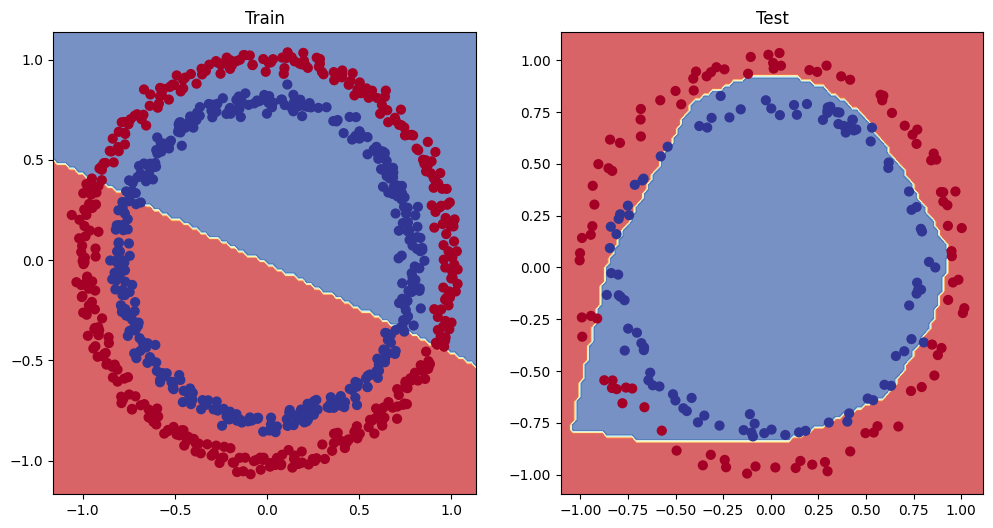

In [120]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity

## 7 Replicating non-linear activation function

In [121]:
# create a tensor
A = torch.arange(-10,10,1 , dtype = torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

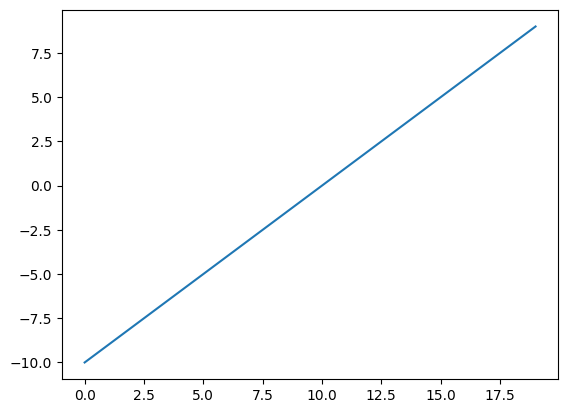

In [122]:
# visualize
plt.plot(A);

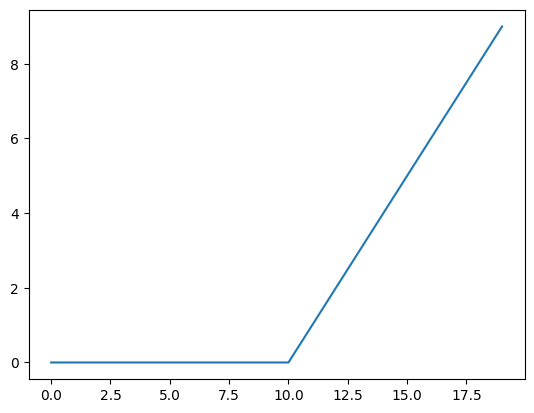

In [123]:
plt.plot(torch.relu(A));

In [124]:
def relu (x: torch.Tensor) -> torch.Tensor:
  return torch.max(torch.tensor(0),x)
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

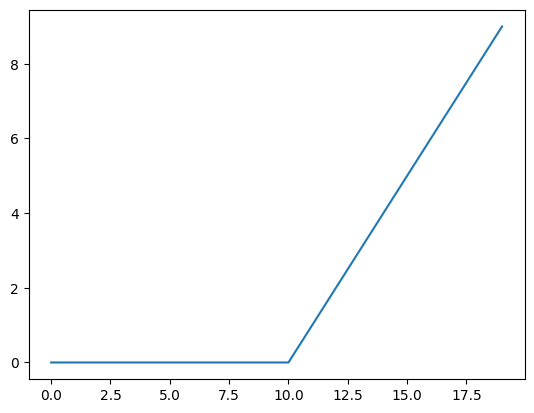

In [125]:
# plot relu function
plt.plot(relu(A));

In [126]:
# sigmoid
def sigmoid (x):
  return 1 / ( 1 + torch.exp(-x))
sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

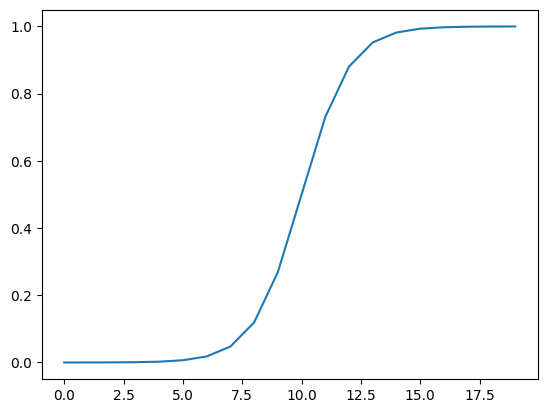

In [127]:
plt.plot(sigmoid(A));

## 8. Putting things together by building a multi-class PyTorch model

### 8.1 Creating mutli-class classification data



tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


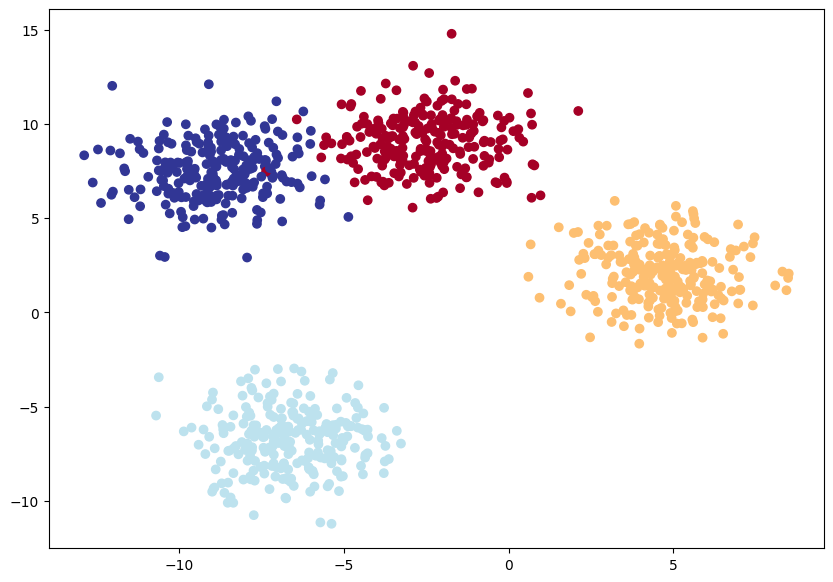

In [160]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

### 8.2 building multi-class classification model

In [161]:
# create device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [162]:
from torch import nn

# Build model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=NUM_FEATURES,
                    output_features=NUM_CLASSES,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 8.3 Creating a loss function and optimizer for a multi-class PyTorch model

In [163]:
# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(),
                            lr=0.1) # exercise: try changing the learning rate here and seeing what happens to the model's performance

### 8.4 Getting prediction probabilities for a multi-class PyTorch model

`logits` (raw output of the model) -> `prediction probabilities`(use `torch.softmax`) -> `prediction labels` (take the argmax of the prediction probabilites)

In [164]:
next(model_4.parameters()).device

device(type='cuda', index=0)

In [141]:
X_blob_test.device

device(type='cpu')

In [165]:
# Perform a single forward pass on the data (we'll need to put it to the target device for it to work)
model_4(X_blob_train.to(device))[:5]

tensor([[ 0.8630,  0.3068, -0.2134,  0.1628],
        [ 0.4607,  0.5014,  1.2659, -1.1438],
        [-0.2590, -1.2327,  0.0393,  0.2724],
        [-0.0115, -0.7613,  0.2286,  0.0107],
        [ 0.3725,  0.2865,  1.1113, -0.9660]], device='cuda:0',
       grad_fn=<SliceBackward0>)

In [154]:
y_blob_test[:5]

tensor([1., 3., 2., 1., 0.])

In [166]:
# How many elements in a single prediction sample?
model_4(X_blob_train.to(device))[0].shape, NUM_CLASSES

(torch.Size([4]), 4)

In [167]:
# Make prediction logits with model
y_logits = model_4(X_blob_test.to(device))

# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[ 0.8589,  0.3871, -0.0525,  0.0082],
        [ 0.0558,  0.0727,  1.5933, -1.3331],
        [-0.0885, -1.0474, -0.0896,  0.3434],
        [ 0.7350,  0.0805, -0.2788,  0.2666],
        [ 0.6378,  0.6525,  1.0553, -0.9956]], device='cuda:0',
       grad_fn=<SliceBackward0>)
tensor([[0.4077, 0.2543, 0.1639, 0.1741],
        [0.1445, 0.1470, 0.6724, 0.0360],
        [0.2549, 0.0977, 0.2547, 0.3927],
        [0.3986, 0.2072, 0.1446, 0.2495],
        [0.2682, 0.2722, 0.4072, 0.0524]], device='cuda:0',
       grad_fn=<SliceBackward0>)


In [168]:
# Sum the first sample output of the softmax activation function
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0', grad_fn=<SumBackward0>)

In [169]:
# Which class does the model think is *most* likely at the index 0 sample?
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))

tensor([0.4077, 0.2543, 0.1639, 0.1741], device='cuda:0',
       grad_fn=<SelectBackward0>)
tensor(0, device='cuda:0')


### 8.5 Creating a training and testing loop for a multi-class PyTorch model

In [170]:
# Fit the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    model_4.train()

    # 1. Forward pass
    y_logits = model_4(X_blob_train) # model outputs raw logits
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_4.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_4(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.93467, Acc: 9.50% | Test Loss: 0.87796, Test Acc: 78.00%
Epoch: 10 | Loss: 0.22153, Acc: 99.12% | Test Loss: 0.19152, Test Acc: 98.50%
Epoch: 20 | Loss: 0.10216, Acc: 99.12% | Test Loss: 0.09089, Test Acc: 99.50%
Epoch: 30 | Loss: 0.06941, Acc: 99.12% | Test Loss: 0.06056, Test Acc: 99.50%
Epoch: 40 | Loss: 0.05511, Acc: 99.00% | Test Loss: 0.04676, Test Acc: 99.50%
Epoch: 50 | Loss: 0.04729, Acc: 99.00% | Test Loss: 0.03901, Test Acc: 99.50%
Epoch: 60 | Loss: 0.04242, Acc: 99.00% | Test Loss: 0.03409, Test Acc: 99.50%
Epoch: 70 | Loss: 0.03913, Acc: 99.00% | Test Loss: 0.03069, Test Acc: 99.50%
Epoch: 80 | Loss: 0.03677, Acc: 99.00% | Test Loss: 0.02821, Test Acc: 99.50%
Epoch: 90 | Loss: 0.03501, Acc: 99.00% | Test Loss: 0.02631, Test Acc: 99.50%


### 8.6 Making and evaluating predictions with a PyTorch multi-class model

In [171]:
# Make predictions
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[  8.1209,  13.8658, -10.7136,  -5.5040],
        [  1.4278, -15.0388,  -0.5539,   6.9942],
        [-10.9967, -19.1785,  15.8280,   7.4231],
        [  4.3660,   9.6643,  -5.6151,  -4.0175],
        [  9.9915,   5.5591, -12.7331,  -1.4618],
        [  1.1016, -18.6907,   0.0535,   8.6350],
        [-10.3821, -15.1744,  14.8274,   5.6546],
        [  7.5147,   0.0721,  -9.2342,   0.7676],
        [-12.7506, -25.9985,  18.4524,  10.3513],
        [  8.2776,   2.0477, -10.3262,  -0.0504]], device='cuda:0')

In [172]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Test accuracy: 99.5%


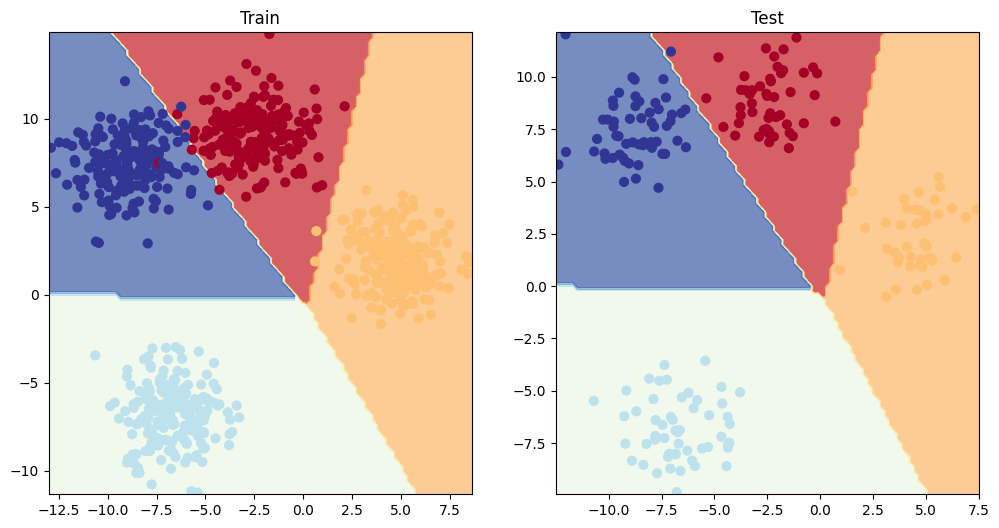

In [173]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)